**Author** : \
Azka Fachrizal Amni ( azka.fachrizal02@gmail.com ) \
Khanaya Saifana Ridwan ( email ) \
Setyo Tirta Abimanyu ( email )

**Disclaimer** : The datasets of this project are from Data Competition ISFEST UMN 2022. 

# Background

## Attributes

attribute markdown

## Objective

Objective markdown

# Import Packages

In [1]:
# Packages
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter("ignore")

# Transcript Data

## Data Preparation

In [2]:
transcript = pd.read_csv('Dataset1_TranscriptMahasiswa.csv', delimiter=';')

In [3]:
# Display 5 samples
transcript.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


In [4]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


In [5]:
# Check Missing Values
transcript.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64

There are missing-values for NAMA_MK, NILAI, and GRADE column. We try to fix the null values and drop NAMA_MK column because it has represented by KODE_MK column.

In [6]:
def drop_data(data) :
    '''
    This function is to fix the null values of the data. 
    '''
    # Because the values of NILAI column are not recorded, we drop the null values
    data = data.dropna(subset=['NILAI']).reset_index(drop=True)

    # Drop NAMA_MK column
    data = data.drop(['NAMA_MK'], axis = 1).reset_index(drop=True)
    
    data['ANGKATAN'] = data['ANGKATAN'].astype('str')
    
    return data 

In [7]:
transcript = drop_data(transcript)

In [8]:
transcript

,NIM,ANGKATAN,SEMESTER,KODE_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,3,57.0,C
1,10110310002,2010,1011,EM180,3,70.0,B
2,10110310002,2010,1011,TI100,4,57.0,C
3,10110310002,2010,1011,TI101,3,59.0,C
4,10110310002,2010,1011,TI110,3,74.0,B
...,...,...,...,...,...,...,...
30853,33849,2018,1821,IS220,3,26.0,E
30854,33849,2018,1821,IS240,3,38.0,E
30855,33849,2018,1821,IS251,2,49.0,D
30856,33849,2018,1821,IS255,4,1.0,E


In [9]:
def convert_score(score):
    '''
    Converting score to grade.
    '''
    if 85 <= score <= 100:
        return 'A'
    elif 80 <= score < 85:
        return 'A-'
    elif 75 <= score < 80:
        return 'B+'
    elif 70 <= score < 75:
        return 'B'
    elif 65 <= score < 70:
        return 'B-'
    elif 60 <= score < 65:
        return 'C+'
    elif 55 <= score < 60:
        return 'C'
    elif 45 <= score < 55:
        return 'D'
    elif 0 < score < 45:
        return 'E'
    elif score == 0:
        return 'F'

In [10]:
# Applying convert score function
transcript['GRADE'] = transcript['NILAI'].apply(lambda score: convert_score(score))

In [11]:
# Checking missing values
transcript.isna().sum()

NIM         0
ANGKATAN    0
SEMESTER    0
KODE_MK     0
SKS         0
NILAI       0
GRADE       0
dtype: int64

As you can see, there are few observations that have incomplete values in NIM column. 

In [12]:
def fixing_NIM(data) :
    '''
    Fixing incomplete value in NIM column
    '''
    # Fixing NIM
    
    for i in range(data.shape[0]):
        data['NIM'].values[i] = str(data['NIM'].values[i])
        if len(str(data['NIM'][i])) != 11 :
            if len(str(data['NIM'][i])) == 5 :
                str_angkatan = str(data['ANGKATAN'][i])
                data['NIM'][i] = str_angkatan[2:] + '11031' + str(data['NIM'][i])
            elif len(str(data['NIM'][i])) == 4 :
                str_angkatan = str(data['ANGKATAN'][i])
                data['NIM'][i] = str_angkatan[2:] + '110310' + str(data['NIM'][i])
        else :
            pass
        
    return data

In [13]:
transcript = fixing_NIM(transcript)

In [14]:
# Checking duplicate values
transcript[transcript.duplicated(['NIM','KODE_MK'])]

,NIM,ANGKATAN,SEMESTER,KODE_MK,SKS,NILAI,GRADE
346,10110310011,2010,1011,EM100,3,74.0,B
348,10110310011,2010,1011,EM180,3,74.0,B
350,10110310011,2010,1011,TI100,4,74.0,B
352,10110310011,2010,1011,TI101,3,73.0,B
354,10110310011,2010,1011,TI110,3,74.0,B
...,...,...,...,...,...,...,...
6876,11110310080,2011,1411,SI725,3,79.0,B+
6878,11110310080,2011,1411,SI729,3,84.0,A-
6880,11110310080,2011,1411,SI860,4,90.0,A
6882,11110310080,2011,1411,SI863,6,78.0,B+


In the data, it can be seen that there are some data that have duplicates. So, we will try to remove that.

In [15]:
# Drop duplicates
def drop_duplicate(data) :
    data.drop_duplicates(subset=['NIM', 'KODE_MK'], 
                         keep = 'first', 
                         inplace = True)
    data = data.reset_index(drop=True)
    return data

In [16]:
clean_transcript = drop_duplicate(transcript)
clean_transcript

,NIM,ANGKATAN,SEMESTER,KODE_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,3,57.0,C
1,10110310002,2010,1011,EM180,3,70.0,B
2,10110310002,2010,1011,TI100,4,57.0,C
3,10110310002,2010,1011,TI101,3,59.0,C
4,10110310002,2010,1011,TI110,3,74.0,B
...,...,...,...,...,...,...,...
30068,181103133849,2018,1821,IS220,3,26.0,E
30069,181103133849,2018,1821,IS240,3,38.0,E
30070,181103133849,2018,1821,IS251,2,49.0,D
30071,181103133849,2018,1821,IS255,4,1.0,E


## Feature Engineering

In order to determine a student graduate on time or not, we need to check the requirement of graduate each student.

In [17]:
def grade_weight(data) :
    '''
    Creating grade weight feature with the condition as follow
    '''
    grade_weight = {
        'A':4,
        'A-':3.7,
        'B+':3.3,
        'B':3,
        'B-':2.7,
        'C+':2.3,
        'C':2,
        'D':1,
        'E':0,
        'F':0
    }
    
    data['GRADE WEIGHT'] = data['GRADE'].map(grade_weight)
    
    return data

In [18]:
data = grade_weight(clean_transcript)

In [19]:
data

,NIM,ANGKATAN,SEMESTER,KODE_MK,SKS,NILAI,GRADE,GRADE WEIGHT
0,10110310002,2010,1011,EM100,3,57.0,C,2.0
1,10110310002,2010,1011,EM180,3,70.0,B,3.0
2,10110310002,2010,1011,TI100,4,57.0,C,2.0
3,10110310002,2010,1011,TI101,3,59.0,C,2.0
4,10110310002,2010,1011,TI110,3,74.0,B,3.0
...,...,...,...,...,...,...,...,...
30068,181103133849,2018,1821,IS220,3,26.0,E,0.0
30069,181103133849,2018,1821,IS240,3,38.0,E,0.0
30070,181103133849,2018,1821,IS251,2,49.0,D,1.0
30071,181103133849,2018,1821,IS255,4,1.0,E,0.0


In [20]:
def get_DEF_grade(data):
    '''
    Check whether student get grade D/E/F or no
    On column DEF GRADE, there will be two values, which is 0 and 1
    1 means student get grade D/E/F
    0 means student didn't get grade D/E/F
    '''
    DEF_grade = []
    data = data.groupby(['NIM']).sum().reset_index()
    for stud in range(data.shape[0]) :
        if 'D' in data['GRADE'][stud] or 'E' in data['GRADE'][stud] or 'F' in data['GRADE'][stud] :
            DEF_grade.append(1)
        else :
            DEF_grade.append(0)
    
    df = pd.DataFrame()
    df['NIM'] = data['NIM'].unique()
    df['DEF GRADE'] = DEF_grade
    
    return df

In [21]:
stud_DEF_grade = get_DEF_grade(data)

In [22]:
def weighted_score(data) :
    '''
    Creating weighted score feature where it is the value of SKS * Grade Weight
    '''
    nilai_akhir = []

    for i in range(data.shape[0]):
        nilai_akhir.append(data['SKS'].values[i] * \
                           data['GRADE WEIGHT'].values[i])
    
    data["WEIGHTED SCORE"] = nilai_akhir
    
    return data

In [23]:
data = weighted_score(data)

In [24]:
def IPS(data) :
    '''
    Calculate the IPS of each student
    '''
    data = data.drop(['KODE_MK','NILAI','GRADE'],axis = 1)
    
    data = data.groupby(['NIM','SEMESTER']).sum().reset_index()
    
    # calculating IPS by dividing NILAI_AKHIR with SKS
    ips = []
    for i in range(data.shape[0]):
        ips.append(data['WEIGHTED SCORE'].values[i] / \
                   data['SKS'].values[i])
        data['ANGKATAN'][i] = data['ANGKATAN'][i][:4]
    data['IPS'] = ips
    return data

In [25]:
data = IPS(data)

In [26]:
data

,NIM,SEMESTER,ANGKATAN,SKS,GRADE WEIGHT,WEIGHTED SCORE,IPS
0,10110310002,1011,2010,21,17.0,51.0,2.428571
1,10110310002,1021,2010,21,19.0,50.0,2.380952
2,10110310002,1111,2010,15,20.0,50.0,3.333333
3,10110310002,1121,2010,18,16.0,46.0,2.555556
4,10110310002,1211,2010,21,19.0,57.0,2.714286
...,...,...,...,...,...,...,...
5275,181103133657,1821,2018,20,22.1,60.9,3.045000
5276,181103133708,1811,2018,20,20.1,57.2,2.860000
5277,181103133708,1821,2018,20,20.7,57.1,2.855000
5278,181103133849,1811,2018,20,12.0,31.0,1.550000


In [27]:
def semester_count(data) :
    '''
    Count how many semester does each student have
    '''
    student = data['NIM'].unique()
    num_sem = []

    for stud in student:
        stud_data = data[data['NIM'] == stud]
        stud_sem = stud_data['SEMESTER'].unique()
        num_sem.append(len(stud_sem))
    
    df_sem = pd.DataFrame()
    df_sem['NIM'] = student
    df_sem['TOTAL SEMESTER'] = num_sem
    
    return df_sem

In [28]:
def IPK(data, data_sem, data_grade) :
    '''
    Calculate the IPS of each student
    '''
    data = data.groupby('NIM').sum().reset_index()
    
    ipk = []
    for i in range(data.shape[0]):
        ipk.append(data['IPS'].values[i] / \
                   data_sem['TOTAL SEMESTER'].values[i])
        data['ANGKATAN'][i] = data['ANGKATAN'][i][:4]
    
    data = data.drop(['SEMESTER'],axis=1)
    data['DEF GRADE'] = data_grade['DEF GRADE']
    data['TOTAL SEMESTER'] = data_sem['TOTAL SEMESTER']
    data['IPK'] = ipk
    
    return data

In [29]:
data_sem = semester_count(data)

In [30]:
data_sem

,NIM,TOTAL SEMESTER
0,10110310002,9
1,10110310004,12
2,10110310005,8
3,10110310006,8
4,10110310007,8
...,...,...
765,181103133603,2
766,181103133607,3
767,181103133657,2
768,181103133708,2


In [31]:
final_data = IPK(data, data_sem, stud_DEF_grade)

In [32]:
final_data

,NIM,ANGKATAN,SKS,GRADE WEIGHT,WEIGHTED SCORE,IPS,DEF GRADE,TOTAL SEMESTER,IPK
0,10110310002,2010,145,140.0,417.0,25.046627,1,9,2.782959
1,10110310004,2010,145,146.3,420.6,35.804711,1,12,2.983726
2,10110310005,2010,145,181.0,538.0,29.824176,0,8,3.728022
3,10110310006,2010,145,144.0,428.0,24.586081,1,8,3.073260
4,10110310007,2010,145,139.0,414.0,22.983135,1,8,2.872892
...,...,...,...,...,...,...,...,...,...
765,181103133603,2018,40,35.7,98.1,4.905000,1,2,2.452500
766,181103133607,2018,40,35.4,99.2,8.160294,1,3,2.720098
767,181103133657,2018,40,45.5,127.8,6.390000,1,2,3.195000
768,181103133708,2018,40,40.8,114.3,5.715000,1,2,2.857500


In [33]:
def graduate(final_data) :
    '''
    Checking  whether student graduate on time or not
    The condition for student graduate on time is :
    1. Student havent got grade D, E, or F
    2. Student have passed 144 SKS
    3. Student's IPK must 2.5 or more
    4. Total Semester of student must be less or equal to 8
    The column graduate have two values, which is 0 and 1
    1 means student graduate on time
    0 means student not graduate on time
    '''
    stud_list = final_data['NIM'].unique()
    graduate = []
    for student in stud_list :
        stud = final_data.loc[final_data['NIM']==student]
        if stud['DEF GRADE'].values == 0 and stud['SKS'].values >= 144 and stud['IPK'].values >= 2.5 and stud['TOTAL SEMESTER'].values <= 8 :
            graduate.append(1)
        else :
            graduate.append(0)
    
    final_data['GRADUATE'] = graduate
    
    return final_data

In [34]:
data_model = graduate(final_data)

In [35]:
def check_corr(data) :
    corr = data.corr(method = 'pearson')
    plt.figure(figsize=(10,8), dpi =500)
    sns.heatmap(corr,
                annot=True,
                fmt=".2f", 
                linewidth=.5)
    plt.show()
    return

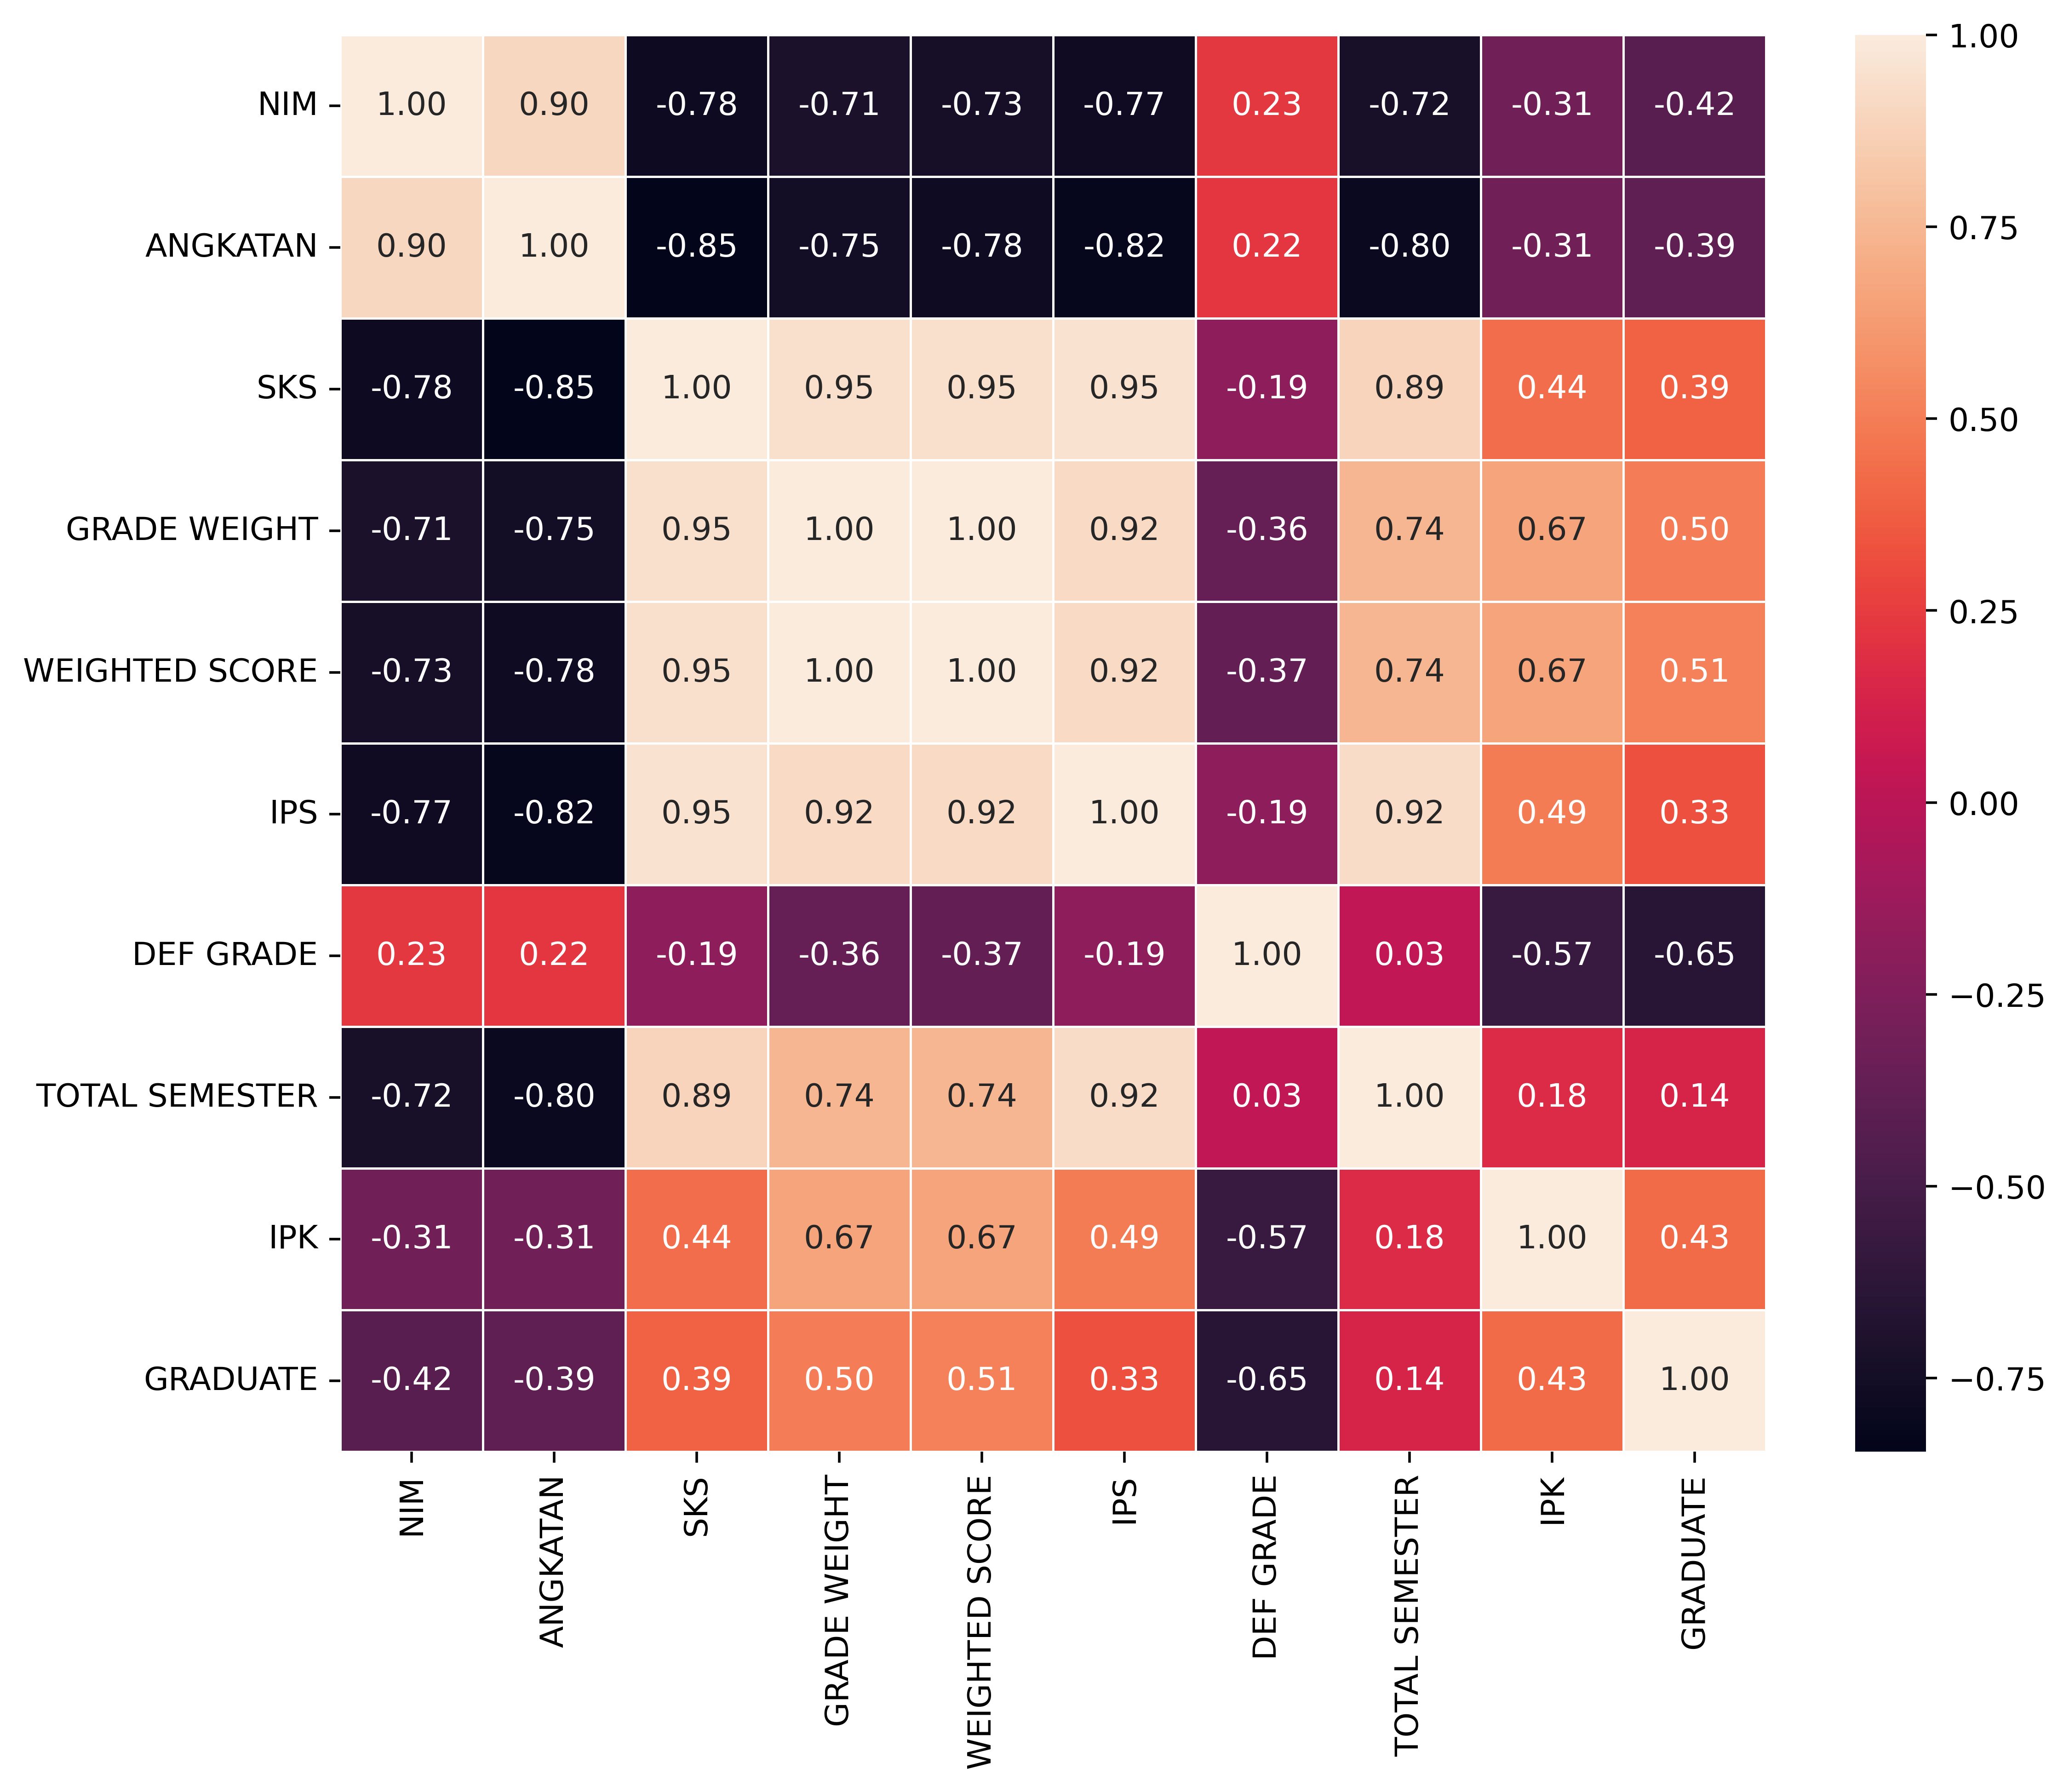

In [36]:
check_corr(data_model)

# Modelling 1

In [37]:
# Train test split
from sklearn.model_selection import train_test_split

In [38]:
X = data_model.drop(['GRADUATE','NIM','DEF GRADE','ANGKATAN'],axis = 1)
y = data_model['GRADUATE']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
# Prediction and Evaluation
predictions = dtree.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       186
           1       0.81      0.93      0.87        45

    accuracy                           0.94       231
   macro avg       0.90      0.94      0.92       231
weighted avg       0.95      0.94      0.95       231

[[176  10]
 [  3  42]]
